In [10]:
from scipy.optimize import minimize
import time
import numpy as np
import matplotlib.pyplot as plt


def generates_random(gen_range, gen_dimension, gen_size):
    return np.random.randint(-gen_range, gen_range, size=(gen_size, gen_dimension))


def optimize(func, method, gen_range, gen_dimension, gen_size, tolerance):
    if func == rosenbrock:
        minimum = [1, 1]
    else:
        minimum = [0, 0]
    running_time = []
    iterations = []
    num_jacobian_evaluation = []
    num_function_evaluation = []
    results = []
    line_data = []
    success_cnt = 0
    inputs = generates_random(gen_range, gen_dimension, gen_size)

    def add_line_data(cur):
        line_data.append(np.linalg.norm(cur - minimum))

    for idx, val in enumerate(inputs):
        start_time = time.time_ns()
        if idx == 0:
            result = minimize(func, val, method=method, tol=tolerance, callback=add_line_data)
        else:
            result = minimize(func, val, method=method, tol=tolerance)
        end_time = time.time_ns()
        runtime = end_time - start_time
        running_time.append(runtime)
        iterations.append(result.get("nit"))
        num_function_evaluation.append(result.get("nfev"))
        if result.get("njev") is not None:
            num_jacobian_evaluation.append(result.get("njev"))
        else:
            num_jacobian_evaluation.append(0)
        results.append(result.get("x"))
        if result.success:
            success_cnt += 1
    results_avg = sum(results) / len(results)
    avg_time = np.sum(running_time) / len(running_time)
    avg_iterations = np.sum(iterations) / len(iterations)
    error_avg = np.linalg.norm(minimum - results_avg)
    success_rate = success_cnt / gen_size
    return (
        method, avg_time, avg_iterations, error_avg, success_rate, line_data)


methods = ["Nelder-Mead", "BFGS", "Powell"]

num_range = 20
num_dimension = 2
num_size = 500
tolerance = 1e-8


def plot(func, methods, parameter):
    stat_dict = {}
    for method in methods:
        result = optimize(func, method, num_range, num_dimension, num_size, tolerance)
        if parameter == "time":
            stat_dict[method] = result[1]
        elif parameter == "iterations":
            stat_dict[method] = np.average(result[2])
        elif parameter == "error":
            stat_dict[method] = result[3]
        elif parameter == "success_rate":
            stat_dict[method] = result[4]
        elif parameter == "convergence_line":
            stat_dict[method] = result[5]
        else:
            print("error parameter")
    if parameter == "convergence_line":
        for key, value in stat_dict.items():
            plt.plot(value, label=key)
        # for method in methods:
        #     plt.plot(stat_dict[method], label=method)
        plt.title("convergence line on function" + func.__name__)
        plt.xlabel('number iterations')
        plt.ylabel('error')
        plt.legend()
        plt.savefig('../images/' + func.__name__ + '_' + parameter + '.jpg')
        plt.show()
    else:
        plt.bar(stat_dict.keys(), stat_dict.values())
        plt.title("average " + parameter + " in function " + func.__name__)
        plt.savefig('../images/' + func.__name__ + '_' + parameter + '.jpg')
        plt.show()



In [3]:
def ellipsoid(x, alpha=1000):
    result = 0
    d = len(x)
    for i in range(0, d):
        tmp = alpha ** (i / (d - 1)) * x[i] ** 2
        result += tmp
    return result


def rosenbrock(x):
    tmp1 = (1 - x[0]) ** 2
    tmp2 = 100 * (x[1] - x[0] ** 2) ** 2
    result = tmp1 + tmp2
    return result


def log_ellipsoid(x, epsilon=10 ** (-4)):
    ellip = ellipsoid(x)
    tmp = epsilon + ellip
    result = np.log(tmp)
    return result


# def h(x, q=10**4):
#     tmp = np.log(1+np.exp(q*x))
#     result = tmp / q
#     return result

def h(x, q=10 ** 4):
    tmp = np.log(1 + np.exp(-np.abs(q * x))) + max(q * x, 0)
    result = tmp / q
    return result


def attractive_sector(x, q=10 ** 4):
    d = len(x)
    result = 0
    for i in range(0, d):
        tmp1 = h(x[i], q)
        result += tmp1 ** 2
        tmp2 = h(-x[i], q)
        result += 100 * tmp2 ** 2
    return result


def sum_powers(x):
    d = len(x)
    result = 0
    for i in range(0, d):
        tmp1 = x[i] ** 2
        tmp2 = tmp1 ** (1 + i / (d - 1))
        result += tmp2
    return result

In [8]:
test_m = minimize(ellipsoid(x=[1, 2, 3], alpha=1000), [1, 2, 3])

TypeError: 'float' object is not callable

f1

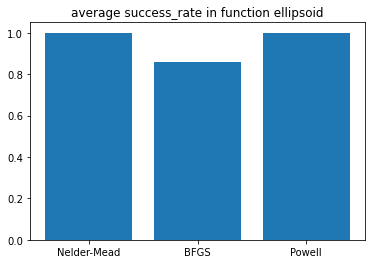

In [9]:
plot(ellipsoid, methods, "success_rate")

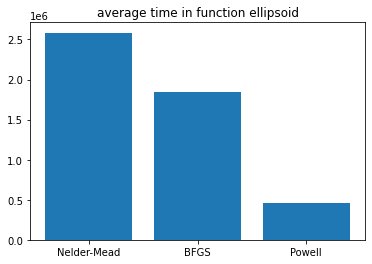

In [399]:
plot(ellipsoid, methods, "time")

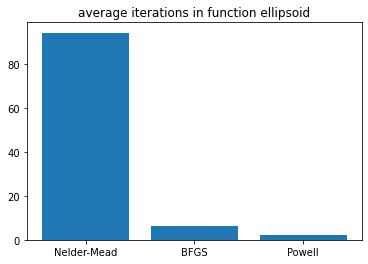

In [400]:
plot(ellipsoid, methods, "iterations")

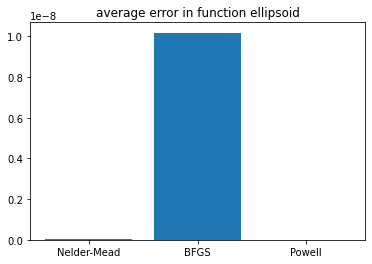

In [401]:
plot(ellipsoid, methods, "error")

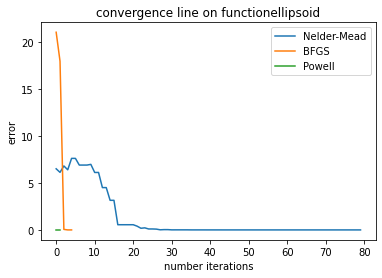

In [402]:
plot(ellipsoid, methods, "convergence_line")

f2

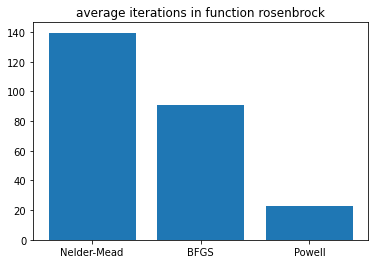

In [403]:
plot(rosenbrock, methods, "iterations")

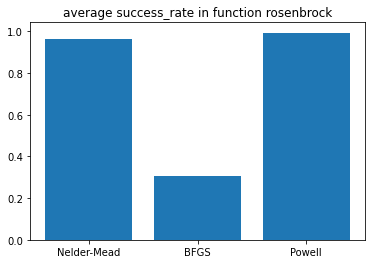

In [404]:
plot(rosenbrock, methods, "success_rate")

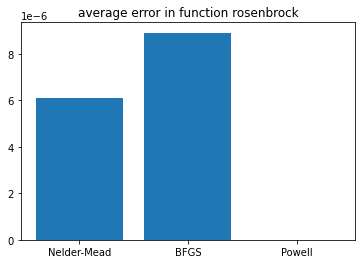

In [405]:
plot(rosenbrock, methods, "error")

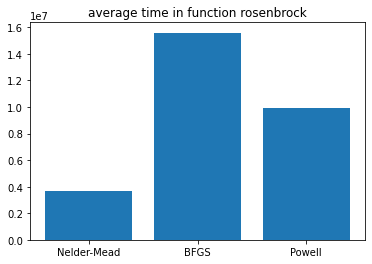

In [406]:
plot(rosenbrock, methods, "time")

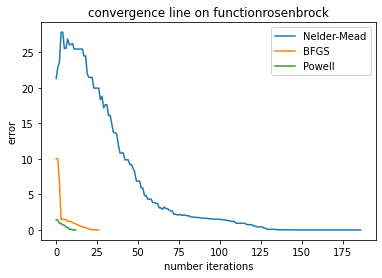

In [424]:
plot(rosenbrock, methods, "convergence_line")

f3

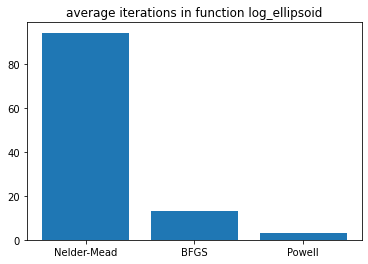

In [408]:
plot(log_ellipsoid, methods, "iterations")

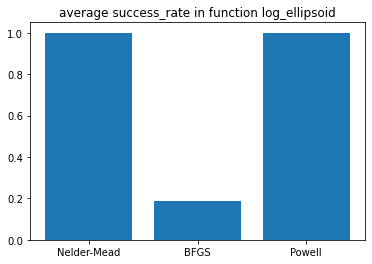

In [409]:
plot(log_ellipsoid, methods, "success_rate")

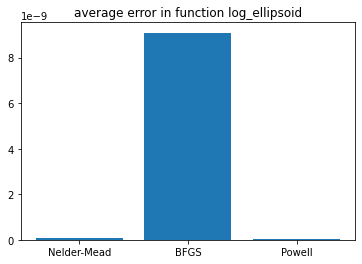

In [410]:
plot(log_ellipsoid, methods, "error")

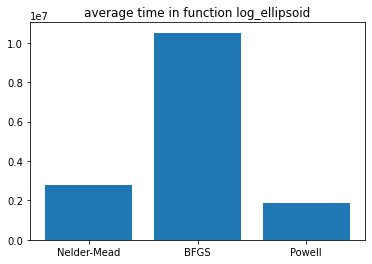

In [411]:
plot(log_ellipsoid, methods, "time")

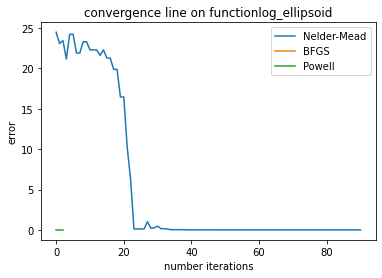

In [412]:
plot(log_ellipsoid, methods, "convergence_line")

f4

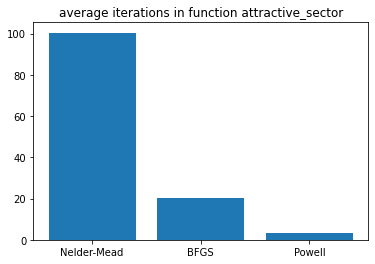

In [413]:
plot(attractive_sector, methods, "iterations")

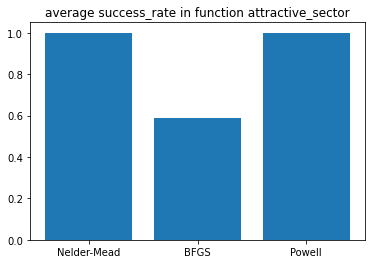

In [414]:
plot(attractive_sector, methods, "success_rate")

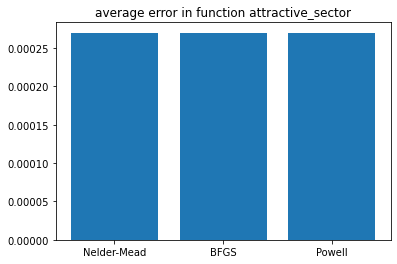

In [415]:
plot(attractive_sector, methods, "error")

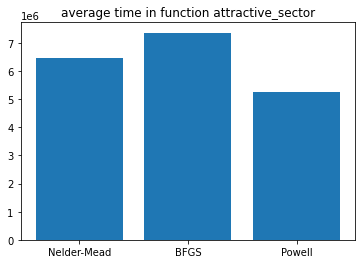

In [416]:
plot(attractive_sector, methods, "time")

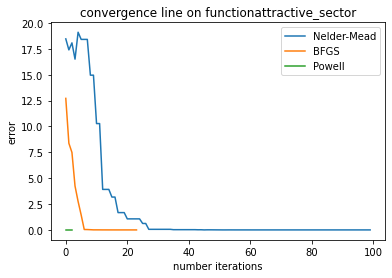

In [417]:
plot(attractive_sector, methods, "convergence_line")

f5

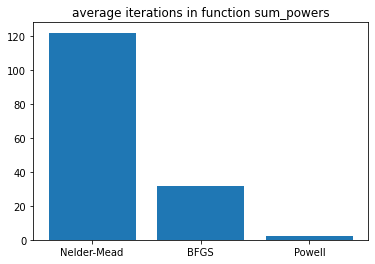

In [418]:
plot(sum_powers, methods, "iterations")

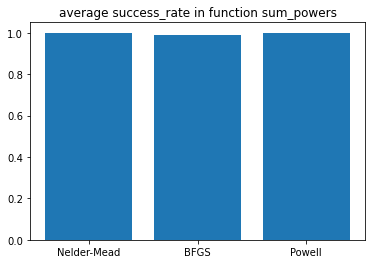

In [419]:
plot(sum_powers, methods, "success_rate")

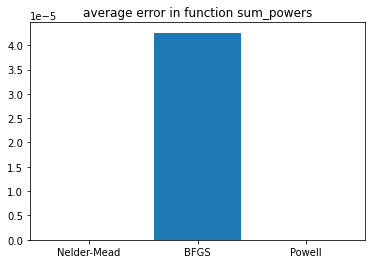

In [420]:
plot(sum_powers, methods, "error")

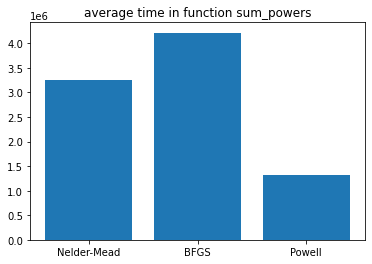

In [421]:
plot(sum_powers, methods, "time")

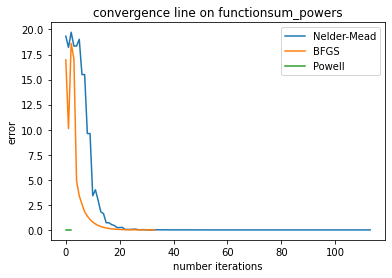

In [422]:
plot(sum_powers, methods, "convergence_line")

In [ ]:
def